In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Dados
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)

# Nota total
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

# Nota das provas que não zeraram
nao_zerou = dados.query("NU_NOTA_TOTAL != 0")


In [15]:
provas_entrada = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

nao_zerou = nao_zerou[provas].dropna()

notas_entrada = nao_zerou[provas_entrada]
notas_saida = nao_zerou[prova_saida]

In [19]:
SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(notas_entrada, notas_saida, test_size=0.25, random_state=SEED)

In [20]:
x_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
90200,542.7,567.7,523.2,660.0
12375,445.2,497.1,423.0,580.0
46320,454.0,494.0,528.5,520.0
111208,385.8,561.9,572.7,640.0
75943,625.7,686.5,646.5,900.0


In [22]:
modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)

/home/gustavo/Projects/imersao-dados/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=4321)

In [25]:
predicoes_matematica = modelo.predict(x_teste)

In [24]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

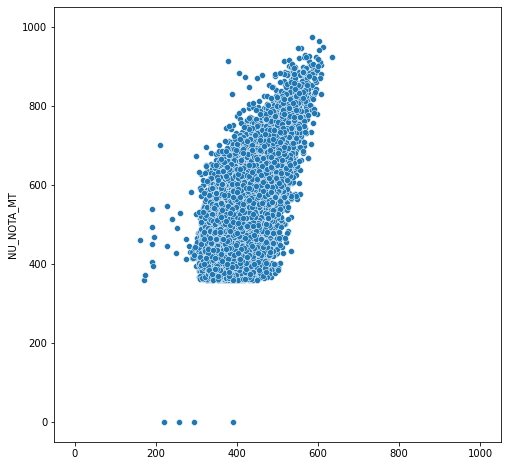

In [26]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [29]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["Diferenca²"] = (resultados["Real"] - resultados["Previsao"])**2
resultados

,Real,Previsao,Diferenca,Diferenca²
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [30]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502